# Group 26 Project Proposal

### Introduction: 

There are a variety of test preparation classes available to students at varying prices. These courses claim to improve students' performance on exams. 

Predictive Question: Can we use the exam scores of students to predict whether they attended a test preparation course?

The `all_exams.csv` data set is used to determine whether a student took a test prep course. Their exam scores from math, reading, and writing would identify if they attended a test prep course. The data set also contains information about high school students from the US, and includes the students’ gender, race/ethnicity, parental level of education, and lunch access.
The size of the sample was increased to 1200 by combining the downloaded data, since the data is generated spontaneously. By doing this, we expect our model to have a higher accuracy because it will be able to gain familiarity with more data examples.


### Primary Exploratory Data Analysis:

In [1]:
#Run this cell 
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(GGally)
library(themis)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

ERROR: Error in library(themis): there is no package called ‘themis’


In [4]:
options(repr.matrix.max.rows = 10)
all_exams<-read_csv("GP_data/all_exams.csv")
all_exams

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  gender = col_character(),
  `race/ethnicity` = col_character(),
  `parental level of education` = col_character(),
  lunch = col_character(),
  `test preparation course` = col_character(),
  `math score` = col_double(),
  `reading score` = col_double(),
  `writing score` = col_double()
)



X1,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,male,group D,some college,standard,none,69,63,62
2,female,group E,bachelor's degree,free/reduced,completed,65,78,80
3,female,group C,some high school,standard,none,57,56,59
4,female,group D,associate's degree,free/reduced,none,62,73,71
5,male,group C,some college,free/reduced,none,46,52,46
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1196,male,group C,associate's degree,standard,completed,65,63,62
1197,female,group C,some high school,standard,none,69,74,68
1198,female,group D,some college,free/reduced,none,43,48,45


In [5]:
#Tidying the data by changing the column names and the chr data types to fct data types

colnames(all_exams)<-c("X1", "gender", "race_ethnicity", "parental_level_of_education",
"lunch", "test_preparation_course", "math_score", "reading_score", "writing_score")

tidying_data <-select(all_exams, gender:writing_score)%>%
    mutate(across(gender:test_preparation_course, as.factor))
tidying_data

gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
male,group D,some college,standard,none,69,63,62
female,group E,bachelor's degree,free/reduced,completed,65,78,80
female,group C,some high school,standard,none,57,56,59
female,group D,associate's degree,free/reduced,none,62,73,71
male,group C,some college,free/reduced,none,46,52,46
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
male,group C,associate's degree,standard,completed,65,63,62
female,group C,some high school,standard,none,69,74,68
female,group D,some college,free/reduced,none,43,48,45


In [6]:
#Creating the new dataset we will be using

exams_data<-tidying_data %>%
    rowwise(math_score:writing_score)%>%
    mutate(avg_grade=mean(math_score:writing_score))%>%
    select(test_preparation_course, math_score, reading_score, writing_score, avg_grade)
exams_data

test_preparation_course,math_score,reading_score,writing_score,avg_grade
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
none,69,63,62,65.5
completed,65,78,80,72.5
none,57,56,59,58.0
none,62,73,71,66.5
none,46,52,46,46.0
⋮,⋮,⋮,⋮,⋮
completed,65,63,62,63.5
none,69,74,68,68.5
none,43,48,45,44.0


In the cells above, we loaded our packages, read our data, and then tidied the dataset for easier handling in the future.


In [12]:
#Splitting the dataset into training and testing data

set.seed(2021)

data_split <- initial_split(exams_data, prop = 0.75, strata = test_preparation_course)
exam_train <- training(data_split)
exam_test <- testing(data_split)

glimpse(exam_train)

Rows: 901
Columns: 5
Rowwise: math_score, reading_score, writing_score
$ test_preparation_course <fct> none, completed, none, none, none, none, none…
$ math_score              <dbl> 69, 65, 57, 62, 46, 39, 78, 57, 80, 85, 79, 5…
$ reading_score           <dbl> 63, 78, 56, 73, 52, 35, 90, 62, 86, 86, 75, 4…
$ writing_score           <dbl> 62, 80, 59, 71, 46, 28, 84, 54, 91, 84, 71, 3…
$ avg_grade               <dbl> 65.5, 72.5, 58.0, 66.5, 46.0, 33.5, 81.0, 55.…


In the cell above, we split our dataset into training and testing data. Only the training data will be used in the next portion of the exploratory data analysis.A class imbalance was present in our data. Students who did not take the test preparation course were more common than those who did. For this reason, the data was balanced using the code above.

In [16]:
exam_recipe <- recipe(test_preparation_course ~ ., data = exam_train)%>% 
  step_upsample(test_preparation_course, over_ratio = 1, skip = FALSE)%>%
  prep()

exam_recipe


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Training data contained 901 data points and no missing data.

Operations:

Up-sampling based on test_preparation_course [trained]

A class imbalance was present in our data. Students who did not take the test preparation course were more common than those who did. For this reason, the data was balanced using the code above.

In [25]:
#Determine the average score of all the exams for students who have completed the test prep course and those who haven't

predictor_means <- exam_train%>%
    group_by(test_preparation_course)%>%
    summarize(
        math_score_average=mean(math_score),
        writing_score_average=mean(writing_score),
        reading_score_average=mean(reading_score),
        total_average_score=mean(avg_grade)
    )
predictor_means

num_obs <- nrow(exam_train)
exam_train %>%
  group_by(test_preparation_course) %>%
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )
num_obs

`summarise()` ungrouping output (override with `.groups` argument)



test_preparation_course,math_score_average,writing_score_average,reading_score_average,total_average_score
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
completed,70.89644,75.24272,74.23301,73.06958
none,64.98480,64.67399,66.88514,64.82939


`summarise()` ungrouping output (override with `.groups` argument)



test_preparation_course,count,percentage
<fct>,<int>,<dbl>
completed,309,34.29523
none,592,65.70477


[1] 901

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



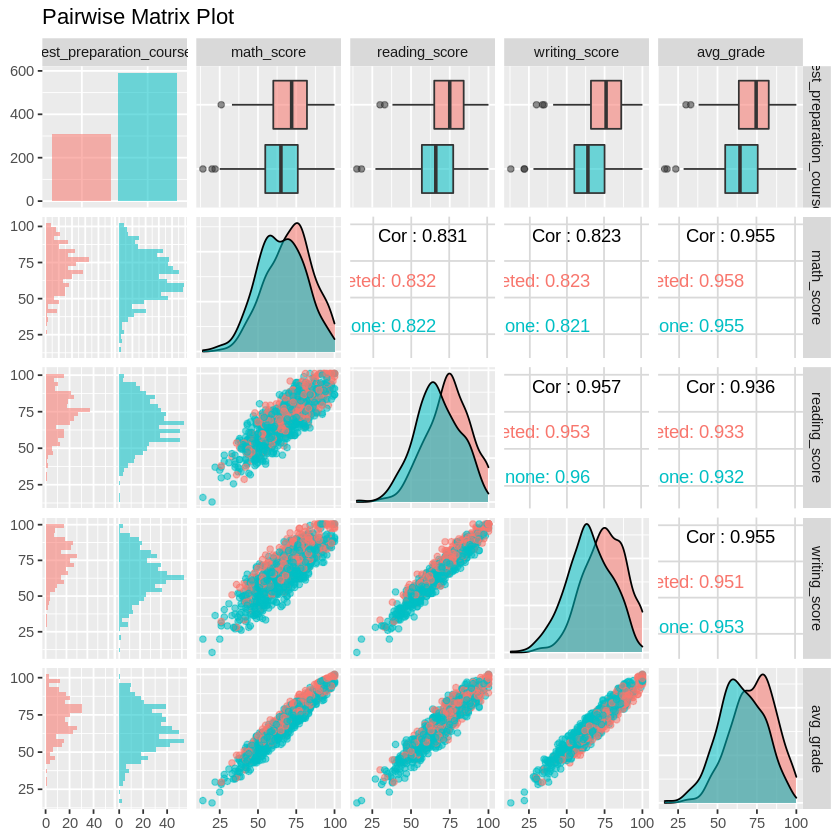

In [29]:
Pairwise_Matrix <- ggpairs(exam_train, title = "Pairwise Matrix Plot", 
                           aes(alpha = 0.2, color = test_preparation_course))
Pairwise_Matrix

The final step of our exploratory data analysis was to create two tables and a matrix plot. The first table summarized the averages of our predictor variables, and the second outlines the number of observations in each class. The plot above allows for easy comparison of the distributions of each predictor variable.

### Methods:

Our data analysis will be conducted using the K nearest neighbor classification algorithm. The predictors used will be the quantitative variables of the math, reading, writing, and average exam scores. The model specification will be created, then passed through a fit function to ensure our model fits the data set. Before scaling and centering the data, cross-validation would be applied to ensure that no selection bias is present. After scaling and centering, a prediction could be made on the new observation. Training data would be used to build the classifier and testing data would be used to estimate the model’s accuracy. Lastly, the model would be retrained with the testing data.

Based on the distribution plots in the Pairwise Matrix Plot above, the math, writing, reading and average exam scores were chosen as predictors. The red peak, representative of the students who completed the test preparation course, shows higher scores for every exam compared to students who did not complete the test preparation course.

Two decision boundary plots will be created for our visualization. The first would have the math score on the x-axis, and the writing score on the y-axis. The second plot would have the reading score on the x-axis, and the writing score on the y-axis.


### Expected outcomes and significance

Our model predicted whether a student attended a test prep course based on their scores over the math, reading, and writing exams. It was expected that there would be a correlation between high exam scores and completion of test preparation classes. This would determine the effectiveness of the test preparation course in students’ performance. Based on the results of this analysis, future projects could examine the impact of the test preparation courses compared to self-studying methods in students. 